# Лабораторная работа 2. Решающие деревья и случайные леса.

Соболева Дарья Михайловна

317 Группа 

In [1]:
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### I. Решающие деревья своими руками
#### Задача 1.
В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__1__

Реализуйте следующую функцию:

Параметры:
* feature_vector: вещественнозначный вектор значений признака (np.array)
* target_vector: вектор классов объектов (np.array). len(feature_vector)==len(target_vector).

Возвращаемые значения:
* thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно разделить на две различные подвыборки, или поддерева (np.array)
* ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds. (np.array, len(ginis)==len(thresholds))
* оптимальный порог (число)
* оптимальное значение критерия Джини (число)

Под критерием Джини здесь подразумевается следующая функция:
$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r),$$
$R$ - множество объектов, $R_l$ и $R_r$ - объекты, попавшие в левое и правое поддерево,
$H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ - доля объектов класса 1 и 0 соответственно.

Указания:
* Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
* За наличие в функции циклов балл будет снижен. Векторизуйте! :)

In [4]:
def check_X_y(X, y):
    if not isinstance(X, np.ndarray):
        X = np.array(X)
        
    if set(y) != {0, 1}:
        raise ValueError('y must consist of 0 and 1')
        
    if not isinstance(y, np.ndarray):
        y = np.array(y)

    if X.shape[0] != y.shape[0]:
        raise ValueError("Incompatible dimension for X and y vectors: "
                         "X.shape[0] == {}\
                          while y.shape[0] == {}".format(X.shape[0],
                                                         y.shape[0]
                                                         )
                         )
    return X, y


def find_best_split(feature_vector, target_vector):
    # H(R) = 2 * p1 * (1 - p1)
    feature_vector, target_vector = check_X_y(feature_vector, target_vector)
    
    ind = np.argsort(feature_vector)
    feature_vector = feature_vector[ind]
    target_vector = target_vector[ind]

    vals, ind, counts = np.unique(
    feature_vector, return_counts=True, return_index=True)

    n = target_vector.shape[0]
    n1 = np.sum(target_vector)
    ind = np.roll(ind - 1, -1)

    n_l1 = np.cumsum(target_vector)[ind[:-1]]
    n_l = np.cumsum(counts)[:-1]
    p_l1 = 1.0 * n_l1 / n_l
    H_l = 2 * p_l1 * (1 - p_l1)

    n_r1 = n1 - n_l1
    n_r = n - n_l
    p_r1 = 1.0 * n_r1 / n_r
    H_r = 2 * p_r1 * (1 - p_r1)

    Q = - n_l * H_l - n_r * H_r 
    Q /= n
    
    ind_opt = np.argmax(Q)
    opt_thr = vals[ind_opt]
    opt_Q = Q[ind_opt]

    return {'thresholds' : vals[:-1], 
            'ginis' : Q, 
            'opt_thr' : opt_thr, 
            'opt_gini' : opt_Q}

__2__
Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах,а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог - значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака - класс" для всех пяти признаков.

In [160]:
!wget http://foreverware.usite.pro/students.csv

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
--2016-11-28 17:39:21--  http://foreverware.usite.pro/students.csv
Resolving foreverware.usite.pro (foreverware.usite.pro)... 213.174.157.151
Connecting to foreverware.usite.pro (foreverware.usite.pro)|213.174.157.151|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7250 (7.1K) [application/octet-stream]
Saving to: 'students.csv'

100%[======================================>] 7,250       --.-K/s   in 0.1s    

2016-11-28 17:39:22 (53.9 KB/s) - 'students.csv' saved [7250/7250]



In [131]:
students = pd.read_csv('students.csv')

predictors = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
target = ' UNS'

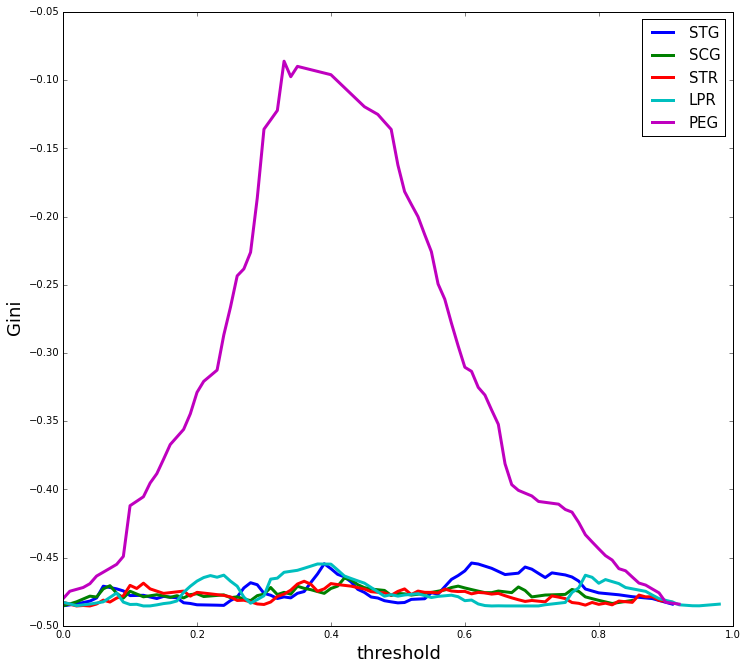

In [41]:
figure(figsize=(12,11))

for col_name in predictors:
    
    res =  find_best_split(students[col_name], students[target])
    thr = res['thresholds']
    gini = res['ginis']
    
    plot(thr, gini,  lw = 3)
    
legend(predictors, loc = 'best', fontsize = 15)
xlabel("threshold", fontsize = 18)
ylabel('Gini', fontsize = 18)
show()

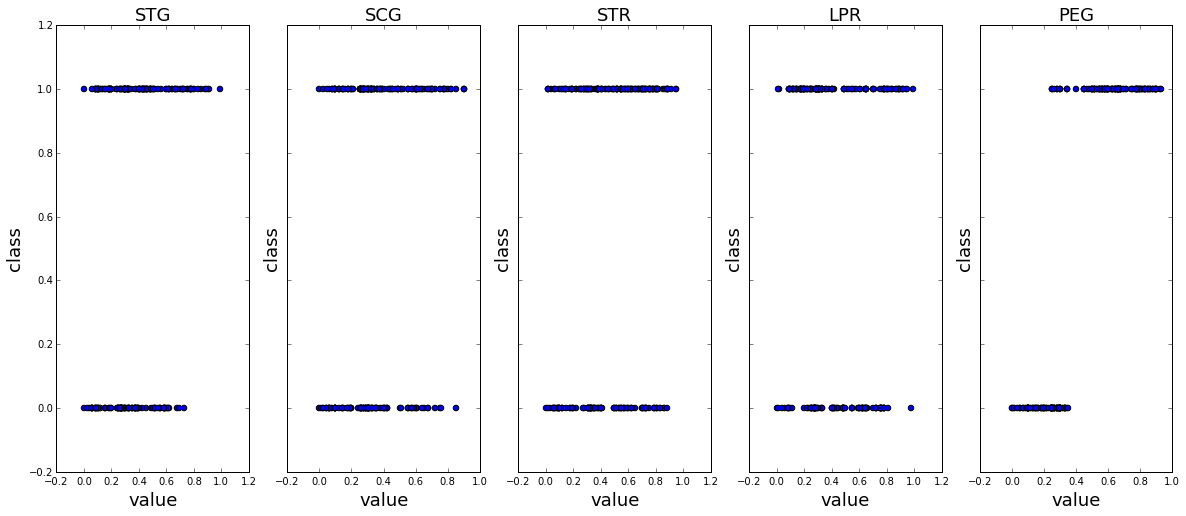

In [89]:
f, (ax1, ax2, ax3, ax4, ax5) = subplots(1, 5, sharey=True, figsize = (20, 8))

for col_name, ax in zip(predictors, [ax1, ax2, ax3, ax4, ax5]): 
    ax.set_ylabel("class", fontsize = 18)
    ax.set_xlabel('value', fontsize = 18)
    ax.set_title(col_name, fontsize=18)
    ax.scatter(students[col_name], students[target], s = 30)
                        
show()

__3__

#### Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

Деление необходимо производить по признаку PEG, так как почти все предикаты, построенные по значениям данного признака, обладают максимальной информативностью по сравнению с остальными признаками.

На scatter-графиках действительно видна корреляция признака PEG с целевой переменной. 
Виден оптимальный порог разбиения, согласующийся с кривыми значения критерия Джини.

На кривых для "хороших" признаков должен быть виден оптиум. То значение, по которому происходит разделение выборки.
Для "плохих" признаков такого не наблюдаем, оптиум расположен за краями. На графиках виден шахматный порядок.

__4__

Реализуйте класс для обучения решающих деревьев. Мы не будем усложнять класс множеством параметров, как в sklearn. Требования к классу:
* Единственный параметр дерева - вектор, задающий типы признаков: если в позиции i стоит 0, то с признаком номер i нужно работать как с вещественным, если 1 - как с категориальным.
* Чтобы классификатор "распознавался" функциями sklearn, необходимо наследовать его от BaseEstimator. 
* У класса должно быть реализовано два метода: fit и predict. Метод fit принимает на вход двумерный np.array - матрицу объекты-признаки и одномерный вектор ответов y, внутри метода происходит обучение дерева. Метод predict принимает на вход двумерную матрицу объекты-признаки (np.array) и возвращает вектор предсказанных классов (одномерный np.array) для всех объектов.
* Построение дерева должно осуществляться согласно базовому жадному алгоритму. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу. Ответ в листе: класс объектов, находящихся в нем. Для категориальных признаков необходимо выполнить преобразование, описанное на [семинаре](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf) в разделе "Учет категориальных признаков".

Далее будут даны рекомендации по реализации решающего дерева. Им следовать необязательно: например, вы можете использовать свою структуру для хранения дерева.
* Дерево можно хранить в виде сложенных списков. Каждая внутренняя вершина дерева - список node длины 4: node[0] хранит индекс признака, по которому в данной вершине делается разбиение, node[1] - порог для разбиения, если i-й признак вещественный, и множество значений признака, с которыми объект попадает в левое поддерево, если i-й признак категориальный, node[2] - левое поддерево (список) и node[3] - правое поддерево (список). В листьях node состоит из единственного элемента - ответа, возвращаемого в этом листе. Пример простого дерева, разделяющего выборку по нулевому признаку по порогу 5 на два листа, возвращающих класс 0 и 1: [0, 5, [0], [1]]. Если в левом поддереве корня выполнять разделение по 1-му признаку по порогу 7: [0, 5, [1, 7, [0], [1]], [1]].
* Внутри функции fit определяется рекурсивная функция fit_node(subX, suby, node), принимающая матрицу объекты-признаки subX и ответы на этих объектах suby, а также ссылку на пустой список node - вершину, в которой необходимо выполнить разбиение на две подвыборки. Функция fit_node должна заполнить этот список вызовами node.append(.....). Если suby состоит из одинаковых значений, нужно добавить к node это значение и выйти. Иначе выполнить перебор по всем признакам: для каждого признака с помощью функции find_best_split найти наилучшее разбиение и выбрать признак, дающий максимальное значение критерия Джини. Для категориальных признаков нужно выполнить специальное преобразование (см. семинар). Вершину нужно заполнить индексом выбранного признака, порогом или множеством значений (задающих разбиение), а затем рекурсивно вызвать fit_node для левого и правого поддерева.
* Внутри функции predict также определяется рекурсивная функция predict_node(x, node), принимающая один объект и вершину. Она проверяет, является ли node листом (это можно определить по длине списка), если да - возвращает node[0], т. е. класс, задаваемый этим листом. Иначе функция определяет, к какому поддереву относится объект, и рекурсивно вызывает себя для этого поддерева.
* В процессе тестирования кода может оказаться, что рекурсивные вызовы повторяются бесконечно. Так происходит, если в одно из поддеревьев попадает пустая подвыборка. Этого быть не должно: пороги, при которых все объекты попадают в одно поддерево, не рассматриваются (см. указания к функции find_best_split).
* Дерево должно давать единичную долю верных ответов на обучающей выборке.
* Протестировать, правильно ли выполняется преобразование категориальных признаков, можно на простой синтетической выборке с одним категориальным признаком, по которому объекты идеально делятся на два класса, и при этом такого эффекта нельзя достичь установкой порога на этот признак.

In [5]:
from sklearn.base import BaseEstimator

class DecisionTree(BaseEstimator):
    """
    Class to implement Decision Tree Classifier.

    Parameters:
    ----------
        types : numpy.array, shape = [n_features]
          Vector with feature types:
            0 -- continious
            1 -- categorical
    """

    def __init__(self, types):
        self._tree = []
        self.types = self._check_types(types)

    def _convert(self, f, y):
        vals, counts = np.unique(f, return_counts=True)
        vals1, counts1 = np.unique(f[y == 1], return_counts=True)

        p = np.zeros(vals.shape[0])

        ind = np.in1d(vals, vals1)
        p[ind] = 1.0 * counts1 / counts[ind]

        ind = np.argsort(p)
        vals = vals[ind]
        counts = counts[ind]

        arr = np.empty(f.max() + 1, dtype=vals.dtype)
        arr[vals] = np.arange(vals.shape[0])
        return arr[f], vals
    
    def fit(self, X, y):
        """Fit the model according to the given training data.

        Parameters:
        ----------
        X : numpy.array, shape = [n_samples, n_features]

        y : numpy.array, shape = [n_samples]
        """
        X, y = self._check_X_y(X, y)
    
        def fit_node(subX, suby, node):
            
            if len(set(suby)) == 1:
                node.append(suby[0])
                return

            Q_best = -np.inf
            thr_best = None
            i_best = None
            f_cat_best = None
            
            for i, (f, t) in enumerate(zip(subX.T, self.types)):

                if len(set(f)) == 1:
                    continue
                    
                if t:
                    f, f_cat = self._convert(f, suby)

                info = find_best_split(f, suby)
                thr = info['opt_thr']
                Q = info['opt_gini']

                if Q > Q_best:
                    Q_best = Q
                    thr_best = thr
                    i_best = i
                    if t:
                        f_cat_best = f_cat
               
            if i_best == None:
                node.append(np.argmax(np.bincount(suby)))
                return
            
            if self.types[i_best]:
                vals_Rl = f_cat_best[:thr_best + 1]
                ind = np.in1d(subX[:, i_best], vals_Rl) 
            else:
                ind = subX[:, i_best] <= thr_best

            Rl = subX[ind]
            Rl_y = suby[ind]

            Rr = subX[~ind]
            Rr_y = suby[~ind]

            node.append(i_best)
            node.append(list(vals_Rl) if self.types[i_best] else thr_best)
            node.append([])
            node.append([])
            fit_node(Rl, Rl_y, node[2])
            fit_node(Rr, Rr_y, node[3])
            
        fit_node(X, y, self._tree)

    def predict(self, X):
        """Predict the class labels for the provided data

        Parameters
        ----------
        X : array-like, shape (n_query, n_features).
            Test samples.

        Returns
        -------
        y : numpy array of shape [n_query]
            Class labels for each data sample.
        """
        def predict_node(x, node):
            if len(node) == 1:
                return node[0]
            
            if isinstance(node[1], list):
                if x[node[0]] in node[1]:
                    return predict_node(x, node[2])
                else:
                    return predict_node(x, node[3])
            else:
                if x[node[0]] <= node[1]:
                    return predict_node(x, node[2])
                else:
                    return predict_node(x, node[3])


        predicted = []
        for x in X:
            predicted.append(predict_node(x, self._tree))
        return np.array(predicted)

    def _check_types(self, types):

        if not isinstance(types, np.ndarray):
            types = np.array(types)
            
        if not np.in1d(types, np.array([0, 1])).all():
            raise ValueError('vector types must consist of 0 and 1')

        return types

    def _check_X_y(self, X, y):
        if not isinstance(X, np.ndarray):
            X = np.array(X)

        if not isinstance(y, np.ndarray):
            y = np.array(y)

        if not np.in1d(y, np.array([0, 1])).all():
            raise ValueError('y must consist of 0 and 1')

        if X.shape[0] != y.shape[0]:
            raise ValueError("Incompatible dimension for X and y vectors: "
                             "X.shape[0] == {}\
                              while y.shape[0] == {}".format(X.shape[0],
                                                             y.shape[0]
                                                             )
                             )
        if X.ndim < 2:
            X = np.atleast_2d(X)

        return X, y

__5__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец - это целевая переменная (e-edible, p-poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что - классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [6]:
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier

In [49]:
msh = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
lb = LabelEncoder()
for col_name in msh.columns:
    msh[col_name] = lb.fit_transform(msh[col_name])
    
target = 'p'
predictors = [col_name for col_name in msh.columns if col_name != target]

X, y = msh[predictors].as_matrix(),  msh[target].as_matrix().astype(int)

X_train, X_test, y_train, y_test = \
                          train_test_split(X, y, test_size=0.3, random_state=241)

types = np.ones(X_train.shape[1])
clf = DecisionTree(types)
clf.fit(X_train, y_train)

scores = {'Accuracy': {'Train':accuracy_score(y_train, clf.predict(X_train)), 
                       'Test':accuracy_score(y_test, clf.predict(X_test))
                           }
         }

pd.DataFrame(scores).T

,Test,Train
Accuracy,1,1


__6__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc - это класс 0, good, vgood - класс 1)
* [nurcery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recom - класс 0, very_recom, priority, spec_prior - класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам - наборы данных, по столбцам - алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scorer=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [7]:
def preprocessing(data, target):
    lb = LabelEncoder()
    for col_name in data.columns:
        data[col_name] = lb.fit_transform(data[col_name])
    
    predictors = [col_name for col_name in data.columns if col_name != target]
    
    X, y = data[predictors].as_matrix(),  data[target].as_matrix().astype(int)
    return X, y

In [40]:
def score(X, y):
    cv = KFold(X.shape[0], 10, shuffle=True, random_state=241)
    
    # Continious features
    types = np.zeros(X.shape[1])
    clf = DecisionTree(types) 
    clf_real = np.mean(
        cross_val_score(
            clf,
            X,
            y,
            scoring=make_scorer(accuracy_score),
            cv=cv))
    
    # Categorical features
    types = np.ones(X.shape[1])
    clf = DecisionTree(types) 
    clf_cat = np.mean(
        cross_val_score(
            clf,
            X,
            y,
            scoring=make_scorer(accuracy_score),
            cv=cv))

    # Real + One-hot-encoding features
    types = np.zeros(X.shape[1])
    clf = DecisionTree(types) 
    clf_one_hot = np.mean(
        cross_val_score(
            clf,
            OneHotEncoder(sparse=False).fit_transform(X),
            y,
            scoring=make_scorer(accuracy_score),
            cv=cv))
    
    # DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=241) 
    clf = np.mean(
        cross_val_score(
            clf,
            OneHotEncoder(sparse=False).fit_transform(X),
            y,
            scoring=make_scorer(accuracy_score),
            cv=cv))
    
    return {'Continious': clf_real, 
            'Categorical': clf_cat,
            'One-hot-encoding':clf_one_hot, 
            'DecisionTreeClassifier':clf}

In [11]:
scores = {}

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
target = 'p'
data = pd.read_csv(url)
X, y = preprocessing(data, target)
scores['mushrooms'] = score(X, y)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'
target = 'positive'
data = pd.read_csv(url)
X, y = preprocessing(data, target)
scores['tic-tac-toe'] = score(X, y)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
target = 'unacc'
data = pd.read_csv(url)

data.loc[data[target] == 'good', target] = 1
data.loc[data[target] == 'vgood', target] = 1
data.loc[data[target] == 'acc', target] = 0
data.loc[data[target] == 'unacc', target] = 0

X, y = preprocessing(data, target)
scores['cars'] = score(X, y)


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data'
target = 'recommend'
data = pd.read_csv(url)

data.loc[data[target] == 'very_recom', target] = 1
data.loc[data[target] == 'priority', target] = 1
data.loc[data[target] == 'spec_prior', target] = 1
data.loc[data[target] == 'not_recom', target] = 0
data.loc[data[target] == 'recommend', target] = 0

X, y = preprocessing(data, target)
scores['nursery'] = score(X, y)

pd.DataFrame(scores).T

,Categorical,Continious,DecisionTreeClassifier,One-hot-encoding
cars,0.990731,0.990728,0.988399,0.922389
mushrooms,1.000000,1.000000,1.000000,0.892777
nursery,0.999691,0.999691,0.999691,0.666562
tic-tac-toe,0.948772,0.864178,0.941480,0.695965


__7__
#### Проанализируйте результаты эксперимента. Одинаково ли для разных наборов данных ранжируются алгоритмы? Порассуждайте, почему так происходит. 

Для разных наборов данных алгоритмы ранжируются одинаково, так как используемые детасеты состоят из категориальных признаков.
 А значит, логичнее всего преобразовывать в соотвествии с их природой (методы Categorical и Continious).

One-hot-encoding, очевидно, не очень подходит для деревьев. Классификатор может просто не добраться до некоторых признаков.
Такой способ преобразования исходных данных больше подходит для линейных моделей.

Наконец, метод Categorical работает даже чуть лучше, чем sklearn-кий DecisionTreeClassifier. 


#### Обратите внимание на значение признаков в разных наборах данных. Присутствует ли в результатах какая-то компонента случайности? Можно ли повлиять на нее и улушить работу алгоритмов?


Прежде чем использовать различные алгоритмы, необходимо было оценить значения самих признаков, а также значения целевой переменной.

В результате, в детасете tic-tac-toe целевая переменная была упорядочена. Первая половина класс 1, вторая - класс 0.

В таком случае необходимо переоупорядочить данные, чтобы алгоритм был способен предсказывать что-то адекватное на тестовой выборке.
Данные переупорядочиваются с использованием фиксированного random_seed с целью возможности повторения полученных результатов.

Естественно, способ разбиения на валидацию и обучение может сильно влиять на качество оцениваемых моделей.
Иными словами, попадание в обучение "плохих" объектов сбивает классификатора,
наличие порядка в данных - приводит к простому запоминанию выборки.

### II. Композиции деревьев
#### Задача 2. Сравнение композиционных методов над решающими деревьями
__8 (1 балл)__

Выполните следующие шаги:
1. Загрузите датасет [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в датафрейм. Последний столбец - целевая переменная (содержит классы).
1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * BaggingClassifier со 100 деревьями; каждое дерево обучается только по половине случайно выбранных признаков (см. параметры метода)
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом. Этот пример демонстрирует, что RandomForest - это более сложный алгоритм, чем бэггинг и бэггинг со случайными подпространствами. 

In [37]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
--2016-11-30 15:38:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [text/csv]
Saving to: 'winequality-red.csv'

100%[======================================>] 84,199       106KB/s   in 0.8s   

2016-11-30 15:38:08 (106 KB/s) - 'winequality-red.csv' saved [84199/84199]



In [24]:
data = pd.read_csv('winequality-red.csv', sep=';')
target = 'quality'
predictors = [col_name for col_name in data.columns if col_name != target]

In [20]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
scores = {}
cv = KFold(data.shape[0], 3, shuffle=True, random_state=241)

# DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10) 
scores['DecisionTreeClassifier'] = {'Accuracy' : np.mean(
                                                   cross_val_score(
                                                     clf,
                                                     data[predictors],
                                                     data[target],
                                                     scoring=make_scorer(accuracy_score),
                                                     cv=cv)) }

# BaggingClassifier
clf = BaggingClassifier(n_estimators=100, random_state=10) 
scores['BaggingClassifier'] = {'Accuracy' : np.mean(
                                                   cross_val_score(
                                                     clf,
                                                     data[predictors],
                                                     data[target],
                                                     scoring=make_scorer(accuracy_score),
                                                     cv=cv)) }

# BaggingClassifierHalf
clf = BaggingClassifier(n_estimators=100,  max_features=0.5, random_state=10) 
scores['BaggingClassifierHalf'] = {'Accuracy' : np.mean(
                                                   cross_val_score(
                                                     clf,
                                                     data[predictors],
                                                     data[target],
                                                     scoring=make_scorer(accuracy_score),
                                                     cv=cv)) }

# RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=10) 
scores['RandomForestClassifier'] = {'Accuracy' : np.mean(
                                                   cross_val_score(
                                                     clf,
                                                     data[predictors],
                                                     data[target],
                                                     scoring=make_scorer(accuracy_score),
                                                     cv=cv)) }
pd.DataFrame(scores).T

,Accuracy
BaggingClassifier,0.662289
BaggingClassifierHalf,0.662914
DecisionTreeClassifier,0.584740
RandomForestClassifier,0.676048


Полученные результаты соответствуют ожидаемым.

#### Задача 3. Число деревьев в случайном лесе и в градиентном бустинге
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__9__

Продолжим работать с набором данных [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). Разделите выборку на обучение и контроль с пропорции 7:3, предварительно перемешав объекты. Переберите значения от 100 до 5000 деревьев с шагом 10, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $10 + 20 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

In [25]:
X_train, X_test, y_train, y_test = \
                          train_test_split(data[predictors], data[target], test_size=0.3, random_state=241)

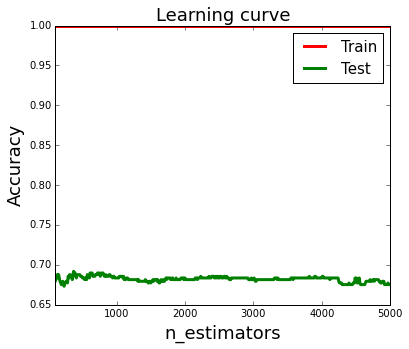

In [38]:
n_list = range(100, 5010, 10)
scores_train = []
scores_test = []

clf = RandomForestClassifier(n_estimators=100, random_state=10, warm_start=True, n_jobs=-1)
                   
for n in n_list:
    clf.fit(X_train, y_train)
    scores_train.append(accuracy_score(y_train, clf.predict(X_train)))
    scores_test.append(accuracy_score(y_test, clf.predict(X_test)))
    
    clf.set_params(n_estimators=n+10)
                       
figure(figsize=(6,5))

plot(n_list, scores_train,  lw = 3, color = 'red')
plot(n_list, scores_test,  lw = 3,  markersize=20, color = 'green')  
                       
legend(['Train', 'Test'], loc = 'best', fontsize = 15)
xlabel("n_estimators", fontsize = 18)
xlim([min(n_list), max(n_list)])
ylim([0.65, 1])
ylabel("Accuracy", fontsize = 18)
title('Learning curve', fontsize = 18)
show()                 

Как видно из графика случайный лес не переобучается с ростом числа  деревьев.

#### Здесь вы можете поделиться мыслями о задании.

Очень понравилось задание. В начале казалось, что будет очень сложно, а оказалось очень даже интересно!

Хочу также отметить важность требования: векторизовать свой код по максимуму. Это, во-первых, очень ускоряет работу методов,
а во-вторых очень интересно сравнивать время работы своих методов с методами коллег.

А также очень здорово, что предложенный на семинаре способ учета категориальных признаков работает лучше библиотечных методов!
Теперь можно и в продакшн:)

А здесь — вставить нарисованную вами смешную картинку.

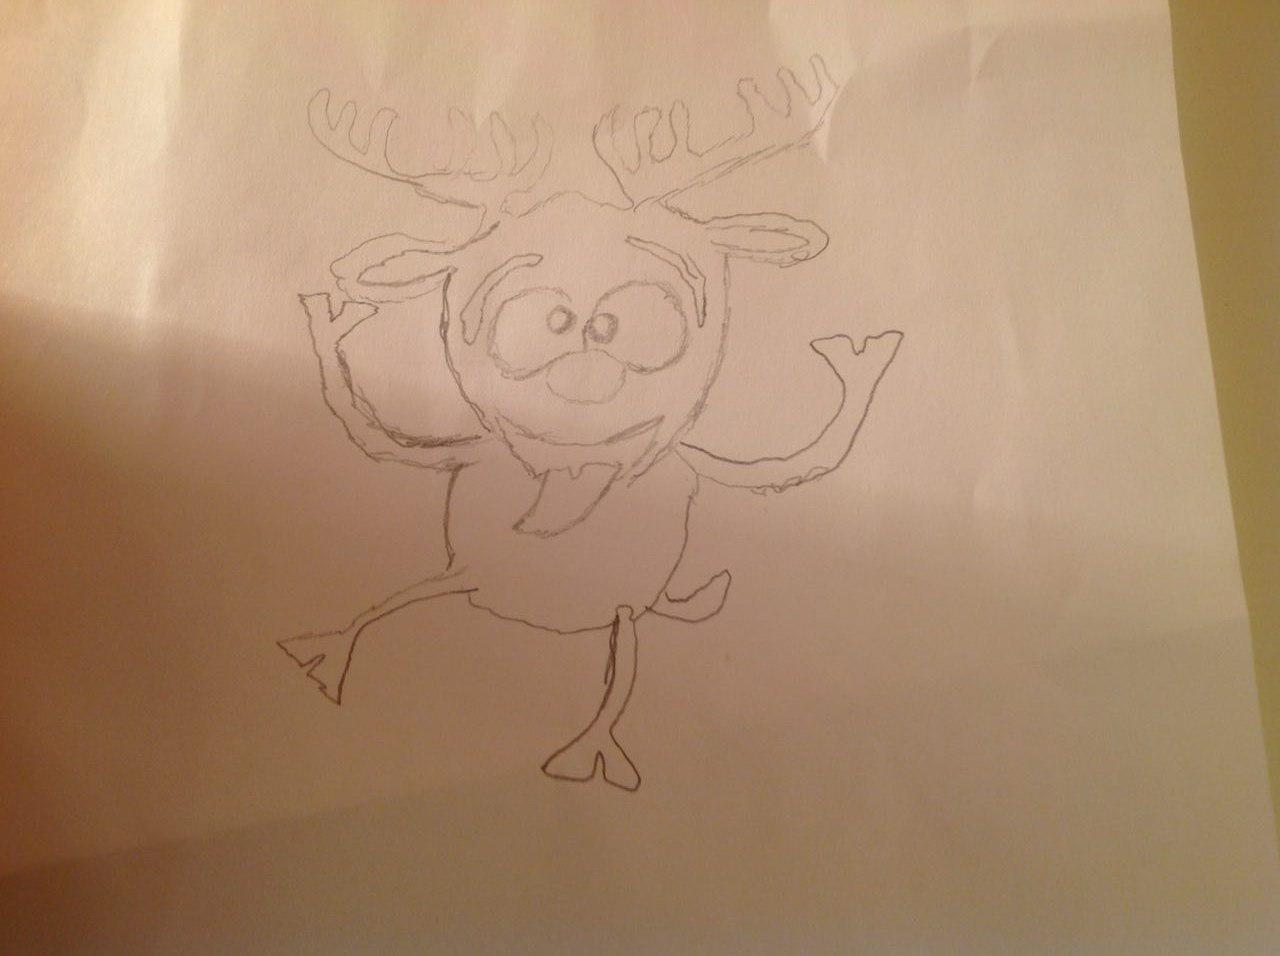

In [43]:
from IPython.display import Image
Image(filename='deer.jpg')